In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
df=pd.read_csv(r'C:\Users\ASUS\Downloads\titanic-passengers.csv', sep=";")
df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [2]:
print(df['Cabin'].head())
print(df['Cabin'].head().isnull())

0      NaN
1    F G73
2      NaN
3      NaN
4      B71
Name: Cabin, dtype: object
0     True
1    False
2     True
3     True
4    False
Name: Cabin, dtype: bool


In [3]:
df.dropna(axis=1,how='any',thresh= 600,inplace= True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


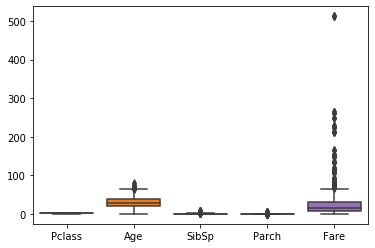

In [4]:
import seaborn as sns 
new_data1= df.drop(["Ticket","PassengerId"], axis=1)
sns.boxplot(data=new_data1)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
new_data1['Survived']=encoder.fit_transform(new_data1['Survived'])
new_data1['Sex']=encoder.fit_transform(new_data1['Sex'])
new_data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,S
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,S
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,S
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,S
...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,C
887,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,7.2292,C
888,0,3,"Cacic, Miss. Marija",0,30.0,0,0,8.6625,S
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,NaN,0,0,7.8958,S


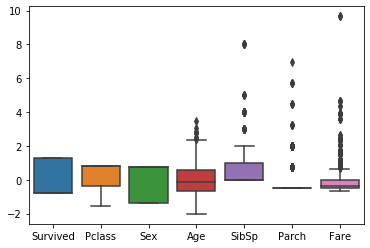

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d=new_data1.copy()
new_data1["Age"]=scaler.fit_transform(new_data1[["Age"]].values)
new_data1["Pclass"]=scaler.fit_transform(new_data1[["Pclass"]].values)
new_data1["Fare"]=scaler.fit_transform(new_data1[["Fare"]].values)
new_data1["Parch"]=scaler.fit_transform(new_data1[["Parch"]].values)
new_data1["Sex"]=scaler.fit_transform(new_data1[["Sex"]].values)
new_data1["Survived"]=scaler.fit_transform(new_data1[["Survived"]].values)
sns.boxplot(data=new_data1)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


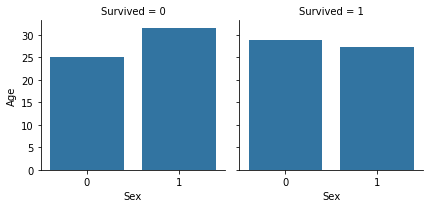

In [7]:
grid = sns.FacetGrid(d,col='Survived')
grid.map(sns.barplot,'Sex','Age',ci=None)
grid.add_legend()

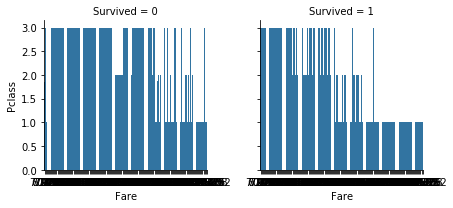

In [8]:
grid = sns.FacetGrid(d,col='Survived')
grid.map(sns.barplot,'Fare','Pclass',ci=None)
grid.add_legend()

In [9]:
def plot_correlation_map( new_data1 ):

    corr = new_data1.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

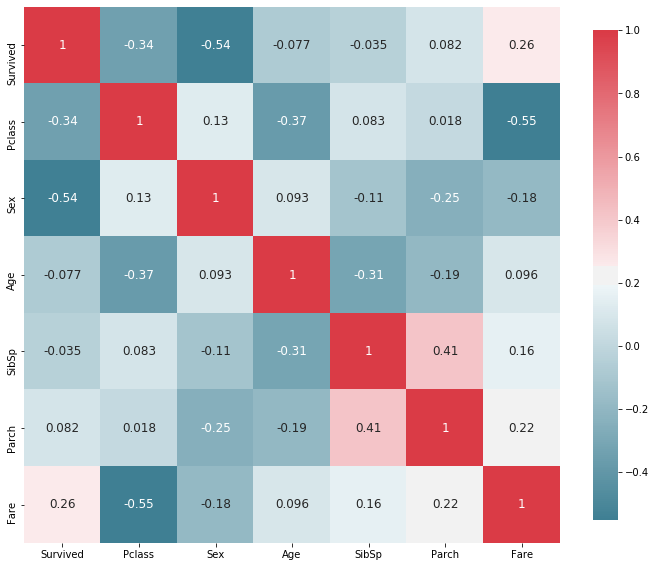

In [10]:
plot_correlation_map( new_data1 )

In [11]:
" After running the funtion we can conclude that the output is like a correlation matrix between outoput and input variables we notice a digonal of ones and we can read correlation between variables from x and y axis for example we read the correlation between Parch and age is equal to -0.19 we can read it by starting from parch below on the x axis to age at the y axis which is the same value -0.19"

' After running the funtion we can conclude that the output is like a correlation matrix between outoput and input variables we notice a digonal of ones and we can read correlation between variables from x and y axis for example we read the correlation between Parch and age is equal to -0.19 we can read it by starting from parch below on the x axis to age at the y axis which is the same value -0.19'

In [12]:
new_data1[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
-1.566107,0.505411
-0.369365,0.182982
0.827377,-0.290911


In [13]:
d["Title"]=d.Name.str.extract(" ([A-Za-z]+)\.")
d

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,S,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,S,Mr
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,S,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,S,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,C,Mrs
887,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,7.2292,C,Mr
888,0,3,"Cacic, Miss. Marija",0,30.0,0,0,8.6625,S,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,NaN,0,0,7.8958,S,Mr


In [14]:
d[['Title','Sex','Fare','Age']].groupby(['Title'], as_index=True).mean()

,Sex,Fare,Age
Title,,,
Capt,1.000000,71.000000,70.000000
Col,1.000000,31.025000,58.000000
Countess,0.000000,86.500000,33.000000
Don,1.000000,27.720800,40.000000
Dr,0.857143,49.168457,42.000000
Jonkheer,1.000000,0.000000,38.000000
Lady,0.000000,39.600000,48.000000
Major,1.000000,28.525000,48.500000
Master,1.000000,34.703125,4.574167


In [15]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
d['Title']=d['Title'].map(Title_Dictionary)
d.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,S,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,S,Mrs
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,S,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,S,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,S,Mrs


In [16]:
d[['Title','Sex','Fare','Age']].groupby(['Title'], as_index=True).mean()

,Sex,Fare,Age
Title,,,
Master,1.000000,34.703125,4.574167
Miss,0.000000,44.104416,21.818792
Mrs,0.804044,28.447283,33.111440
Officer,0.944444,35.786344,46.705882
Royalty,0.750000,31.062500,43.750000


In [19]:
d['Familysize']=d['SibSp']+d['Parch']
del d['SibSp']
del d['Parch']
d.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Familysize
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,13.0000,S,Mrs,0
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,7.6500,S,Mrs,0
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,7.8542,S,Mrs,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,21.0750,S,Mrs,4
4,0,1,"Davidson, Mr. Thornton",1,31.0,52.0000,S,Mrs,1


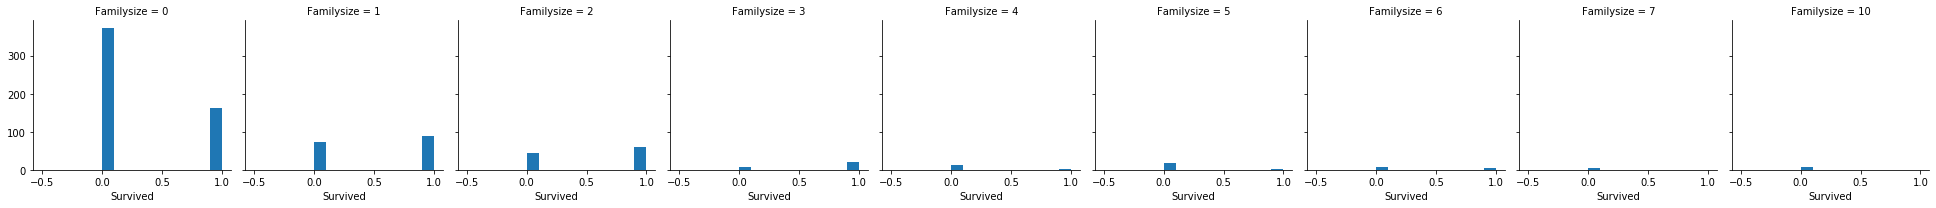

In [23]:
d=sns.FacetGrid(d,col='Familysize')
d.map(plt.hist,'Survived')

In [24]:
" Familysize have an important impact on the output survived, the more the family size is getting greater the less likely to survive"

' Familysize have an important impact on the output survived, the more the family size is getting greater the less likely to survive'